In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pdb

from sklearn.cross_validation import KFold, ShuffleSplit
from benchmarks import FeatureRanking
from feature_ranking import SymmetricalUncertainty  

In [108]:
def barplot_su_features_weight(data, classes, train_size, n_iter = 10):
    features_ranks = []
    cv = ShuffleSplit(len(classes), n_iter=n_iter, test_size=1.-train_size)
    su = SymmetricalUncertainty()
    weights = np.zeros((n_iter,data.shape[0]))
    i = 0
    for train_index, test_index in cv:
        weights[i] = su.weight_features(data[:,train_index],classes[train_index])
        i+=1
        
    average_weights = np.mean(weights, axis=0)
    plt.figure(figsize=(20,15))
    for i in range(n_iter):
        ax = plt.subplot(5,2,i+1)
        ax.bar(np.arange(1,weights.shape[1]+1), weights[i])
        ax.bar(np.arange(1,weights.shape[1]+1), average_weights,
               color='green', alpha = 0.5)
    plt.show()

def barplot_su_features_rank(data, classes, train_size, n_iter = 10):
    features_ranks = []
    cv = ShuffleSplit(len(classes), n_iter=n_iter, test_size=1.-train_size)
    su = SymmetricalUncertainty()
    ranks = np.zeros((n_iter,data.shape[0]))
    i = 0
    for train_index, test_index in cv:
        ranks[i] = su.rank(data[:,train_index],classes[train_index])
        i+=1
        
    average_ranks = np.mean(ranks, axis=0)
    plt.figure(figsize=(20,15))
    for i in range(n_iter):
        ax = plt.subplot(5,2,i+1)
        ax.bar(np.arange(1,ranks.shape[1]+1), ranks[i])
        ax.bar(np.arange(1,ranks.shape[1]+1), average_ranks,
               color='green', alpha = 0.5)
    plt.show()

In [104]:
def hist_su_features_weight(data, classes, train_size, n_iter = 10):
    features_ranks = []
    cv = ShuffleSplit(len(classes), n_iter=n_iter, test_size=1.-train_size)
    su = SymmetricalUncertainty()
    weights = np.zeros((n_iter,data.shape[0]))
    i = 0
    for train_index, test_index in cv:
        weights[i] = su.weight_features(data[:,train_index],classes[train_index])
        i+=1
        
    average_weights = np.mean(weights, axis=0)
    plt.figure(figsize=(20,15))
    for i in range(n_iter):
        ax = plt.subplot(5,2,i+1)
        ax.hist(weights[i])
        ax.hist(average_weights, color='green', alpha = 0.5)
    plt.show()

## MNIST data set

In [122]:
# MNIST
import sklearn.datasets
mnist = sklearn.datasets.load_digits()
data = mnist.data.T
classes = mnist.target

### SU weights of MNIST

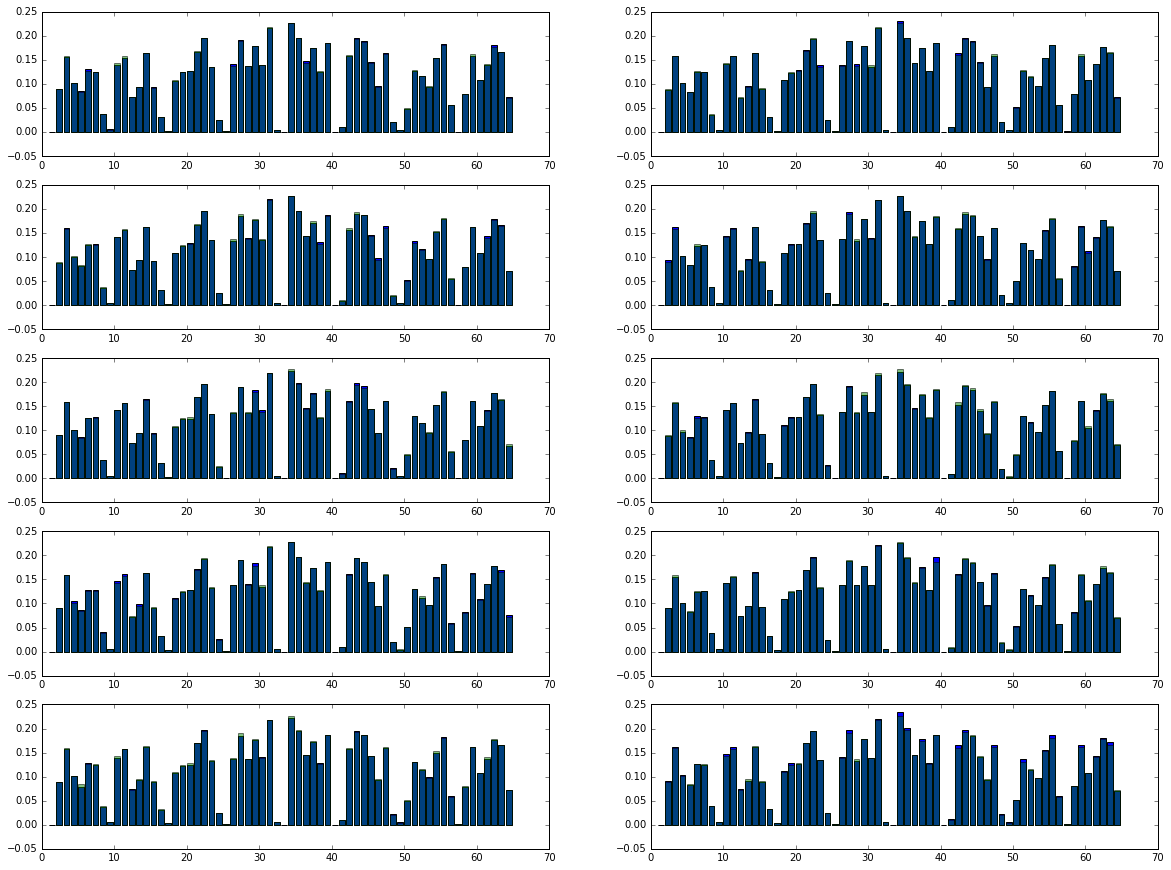

In [112]:
barplot_su_features_weight(data, classes, 0.9)

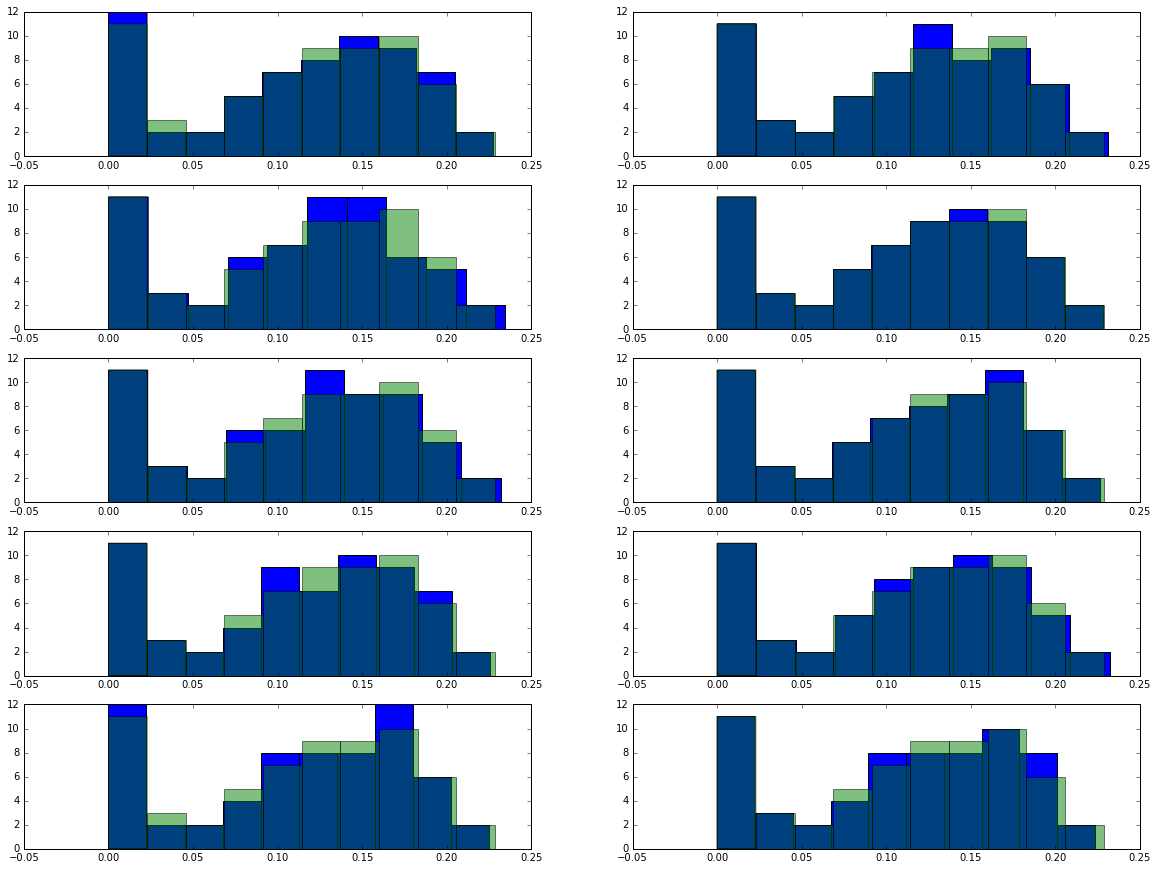

In [113]:
hist_su_features_weight(data, classes, 0.9)

### SU ranks of MNIST

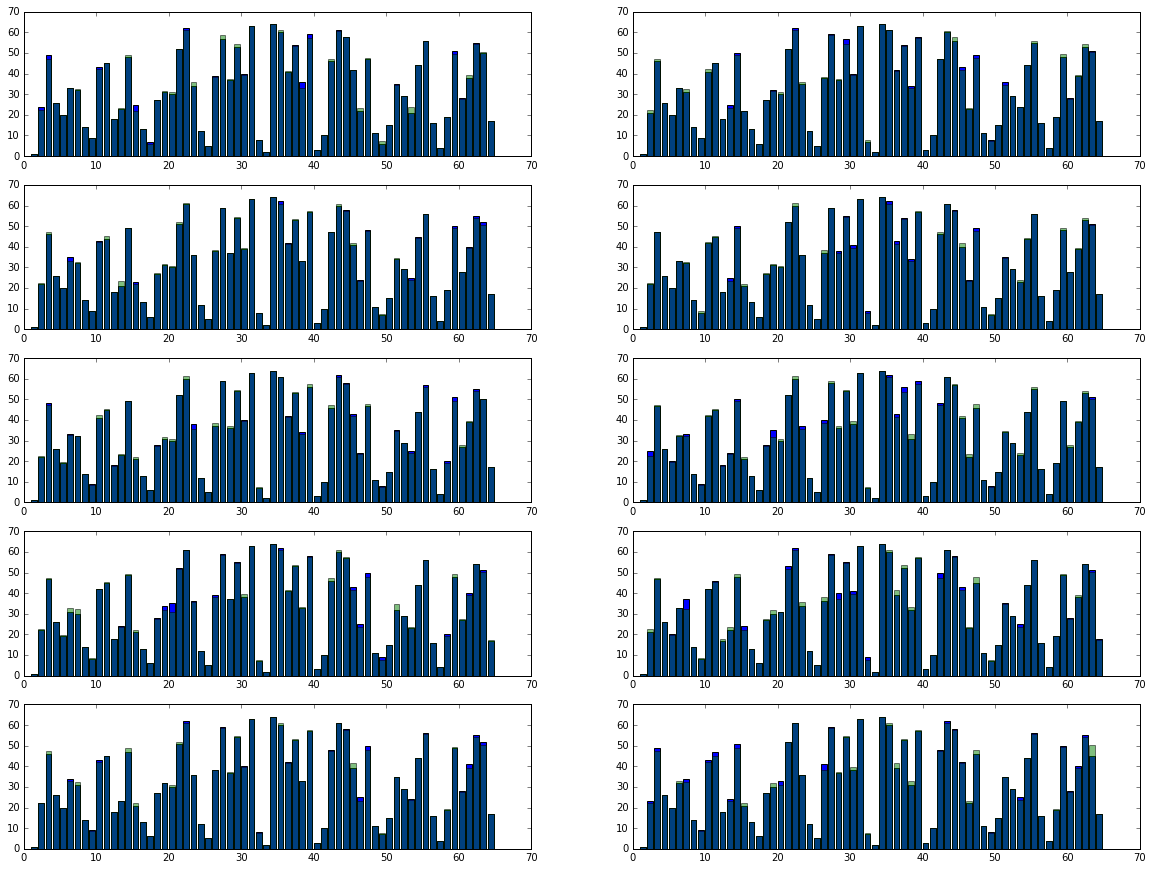

In [54]:
barplot_su_features_rank(data, classes, 0.9)

## Gisette data set

In [124]:
# Gisette
data = np.loadtxt('./data/gisette_train.data').T
classes = np.loadtxt('./data/gisette_train.labels')

### SU weights of Gisette

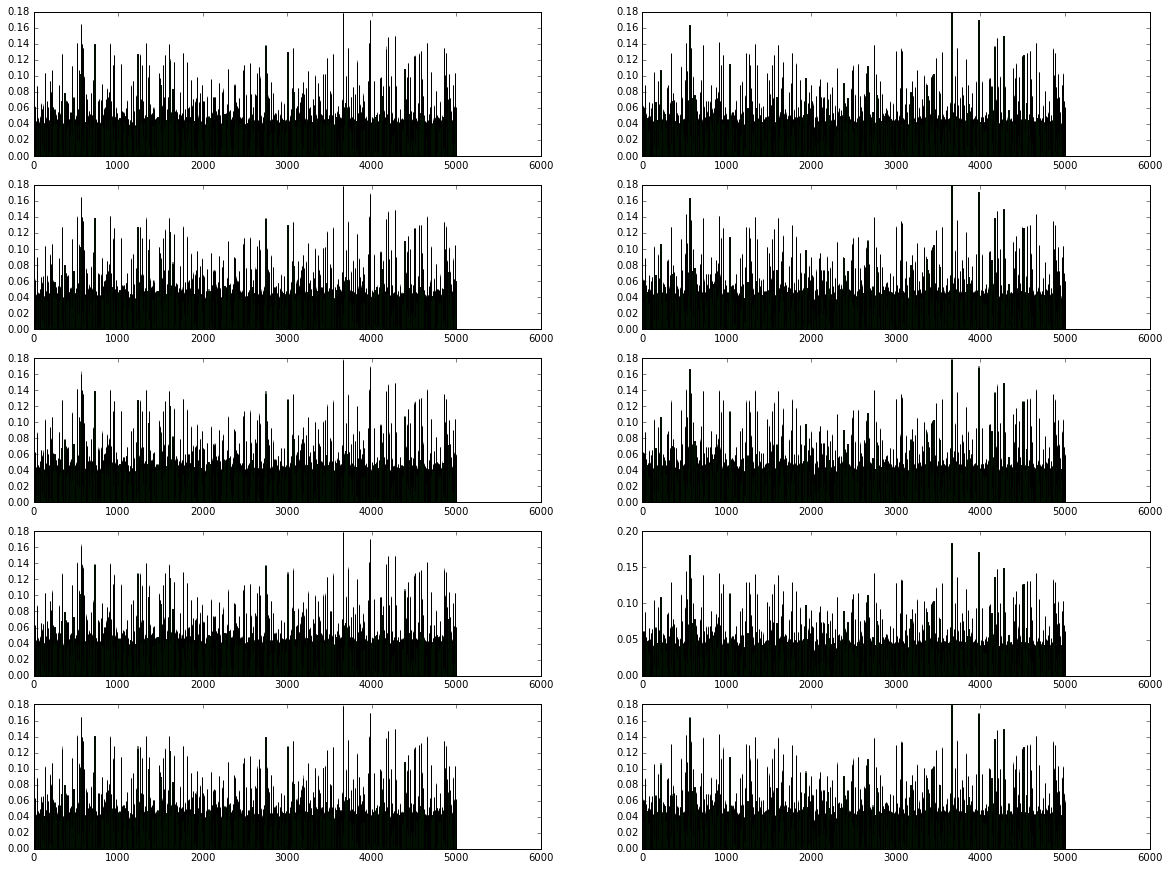

In [125]:
barplot_su_features_weight(data, classes, 0.9)

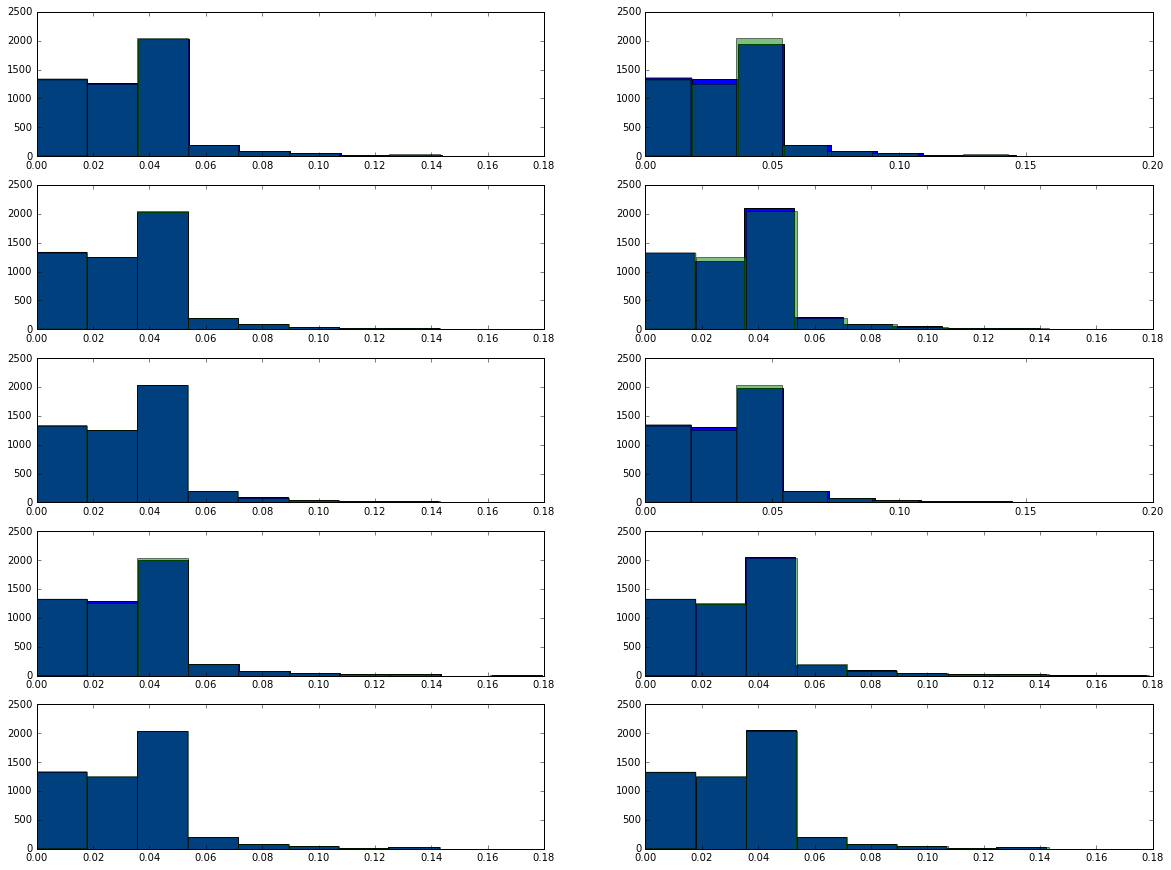

In [126]:
hist_su_features_weight(data, classes, 0.9)

### SU ranks of Gisette

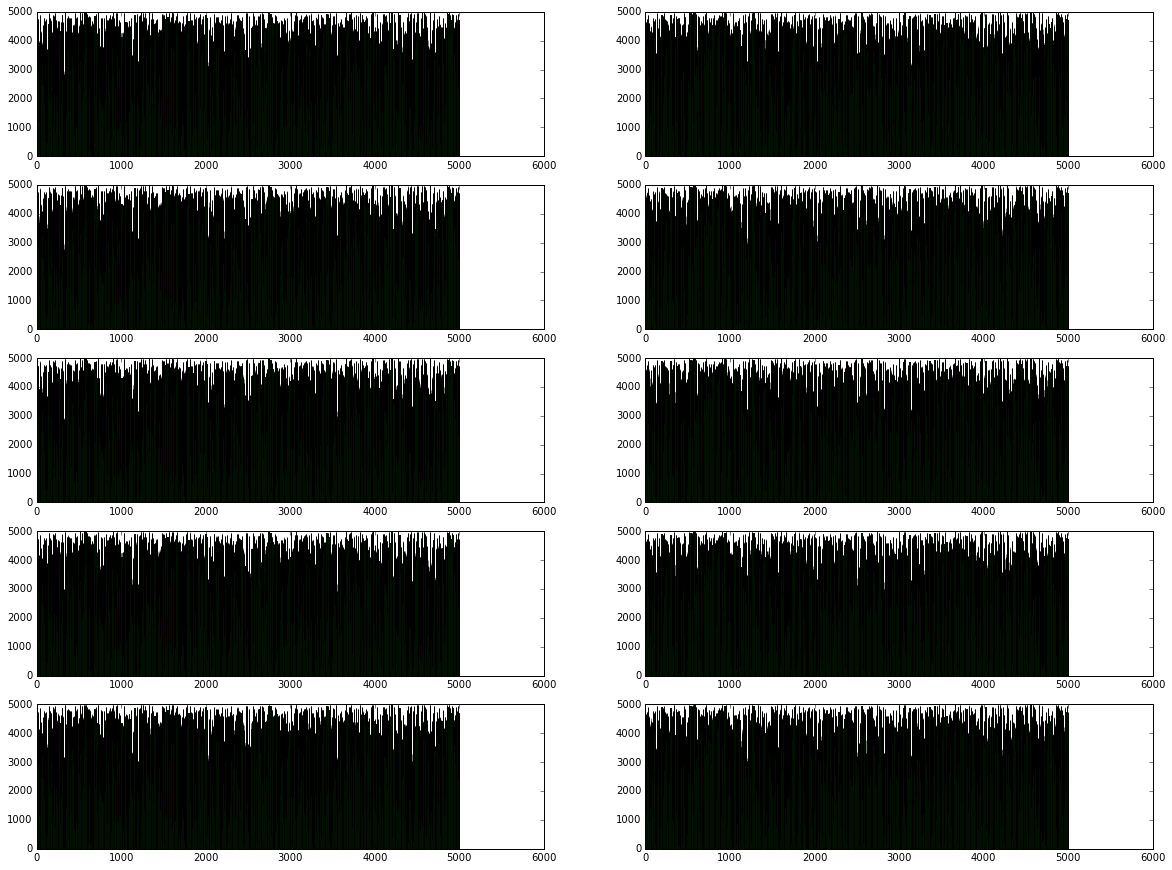

In [127]:
barplot_su_features_rank(data, classes, 0.9)

## Colon data set

In [120]:
# Colon data
data = np.loadtxt('./data/colon.data')
classes = np.loadtxt('./data/colon.labels')

### SU weights of Colon

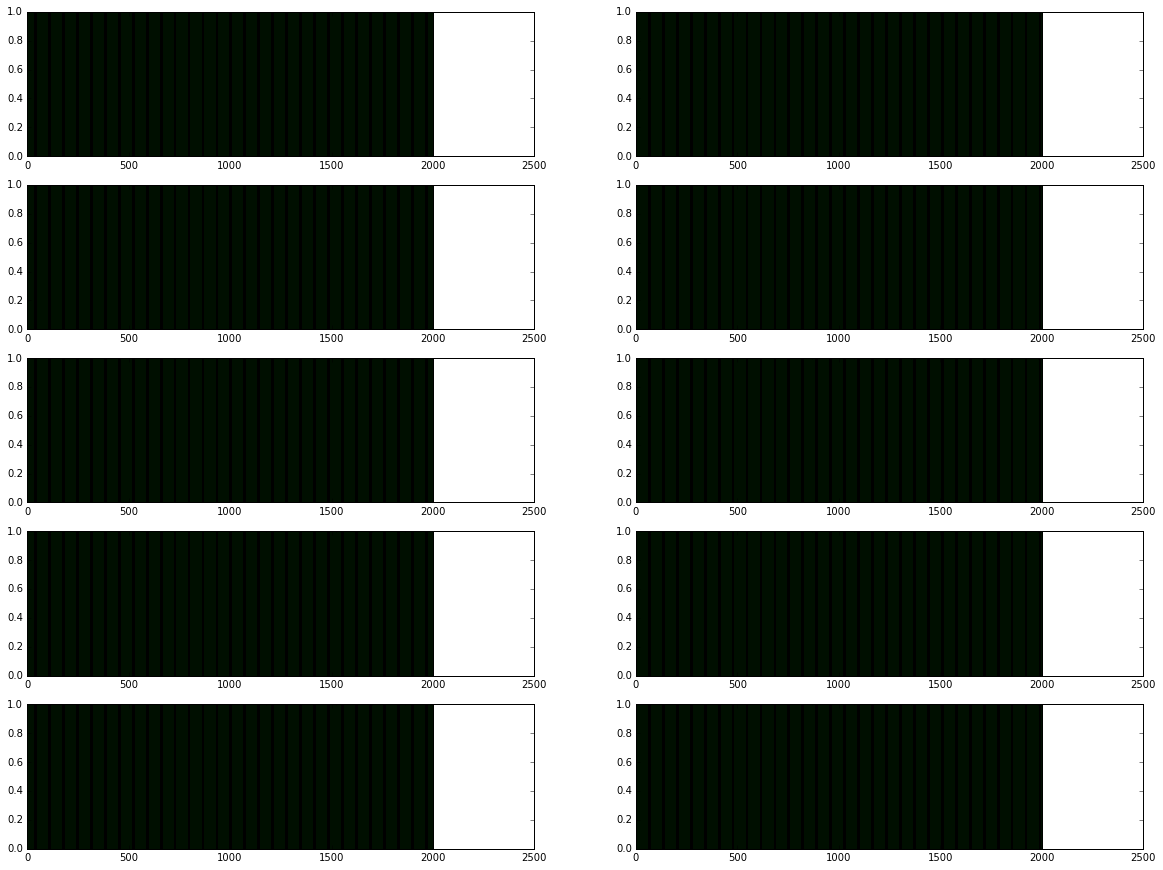

In [101]:
barplot_su_features_weight(data, classes, 0.9)

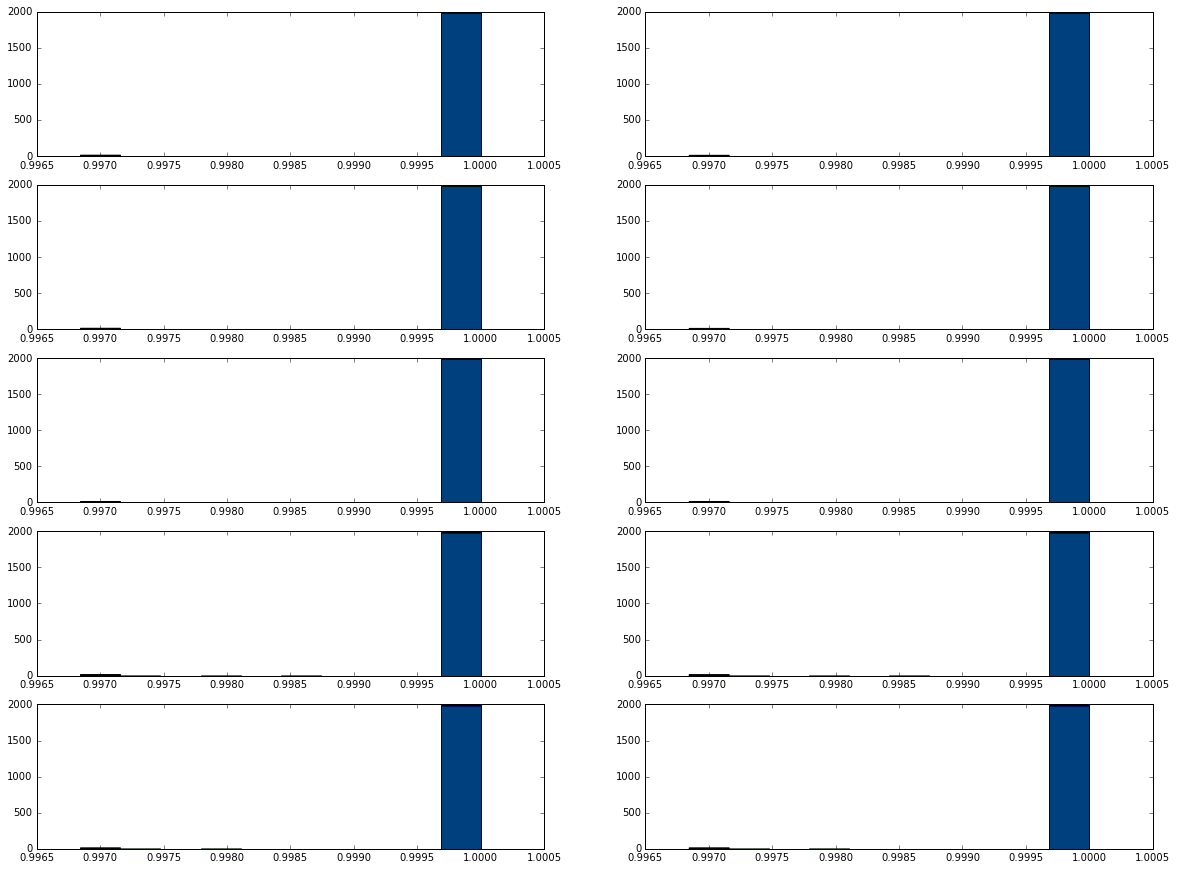

In [106]:
hist_su_features_weight(data, classes, 0.9)

### SU ranks of Colon

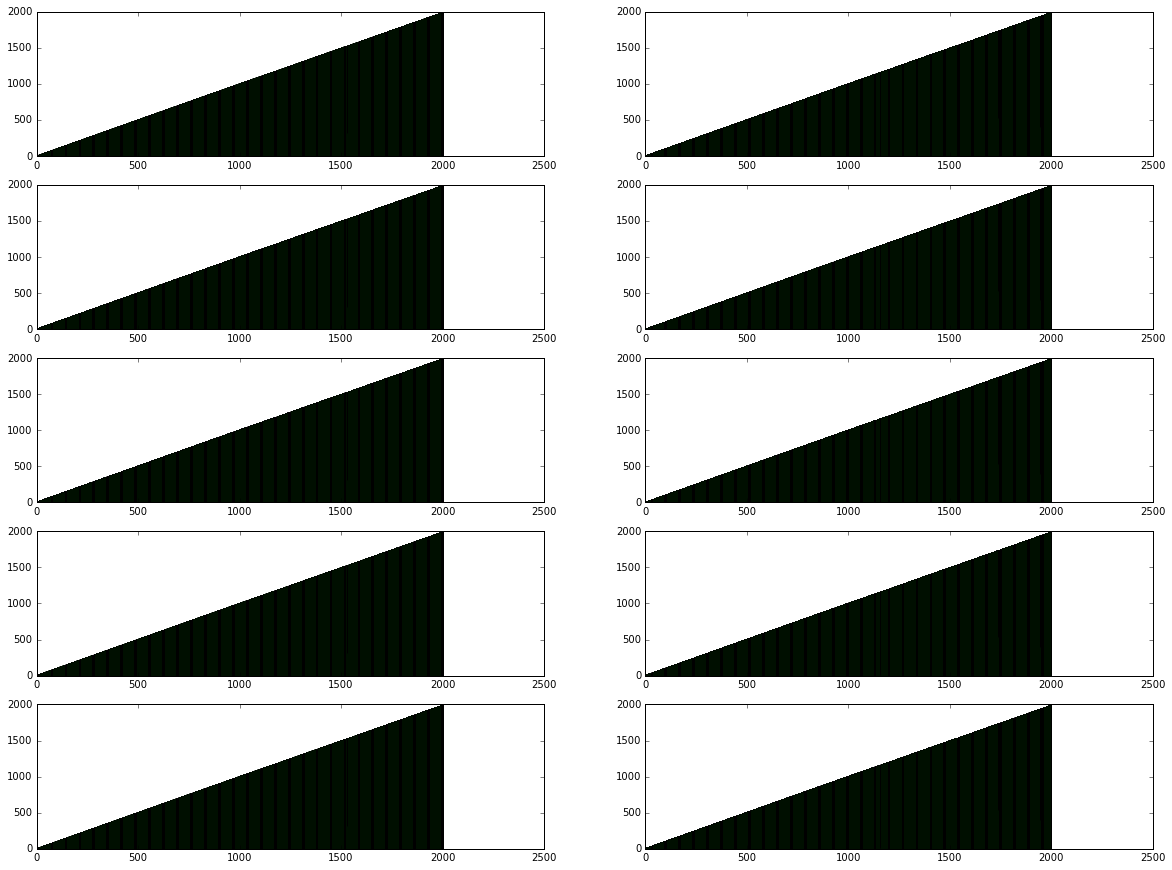

In [110]:
barplot_su_features_rank(data, classes, 0.9)